In [2]:
import warnings
warnings.filterwarnings('ignore')

from toolkit import MNIST
data = MNIST(download=False)

In [3]:
x_train = data.x_train[:5000, :]
y_train = data.y_train[:5000]

In [8]:
x_train.shape

(5000, 784)

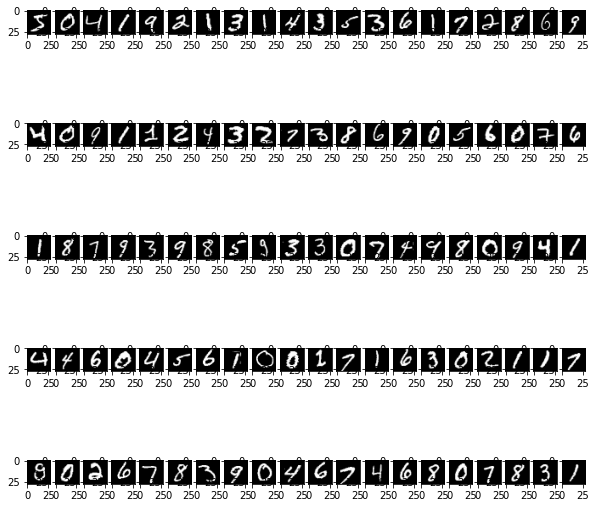

In [5]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(5,20,figsize=(10,10))
for i in range(5):
    for j in range(20):
        # convert feature vector into an image matrix
        img = x_train[i*20+j,:].reshape([28,28]) 
        axs[i,j].imshow(img,cmap='gray')                                                                            
plt.show()

In [21]:
from sklearn.neural_network import MLPClassifier

alltest = {}

# larger batch size would increase loss_decrease speed, 100 here
# relu is enough
# learning rate not too small, but keep it small

for hidl in [(10, 10), (100, 200), (100, 100, 100)]:
    nn = MLPClassifier(hidden_layer_sizes=(hidl), activation='relu', solver='adam', batch_size=100, learning_rate_init=0.001, max_iter=50, momentum=0.8)

    nn.fit(x_train, y_train)
    alltest['H_%s, act_relu, sol_adam, bs_100, lr_0.001, mi_50, mo_0.8'%(str(hidl))] = nn.loss_curve_

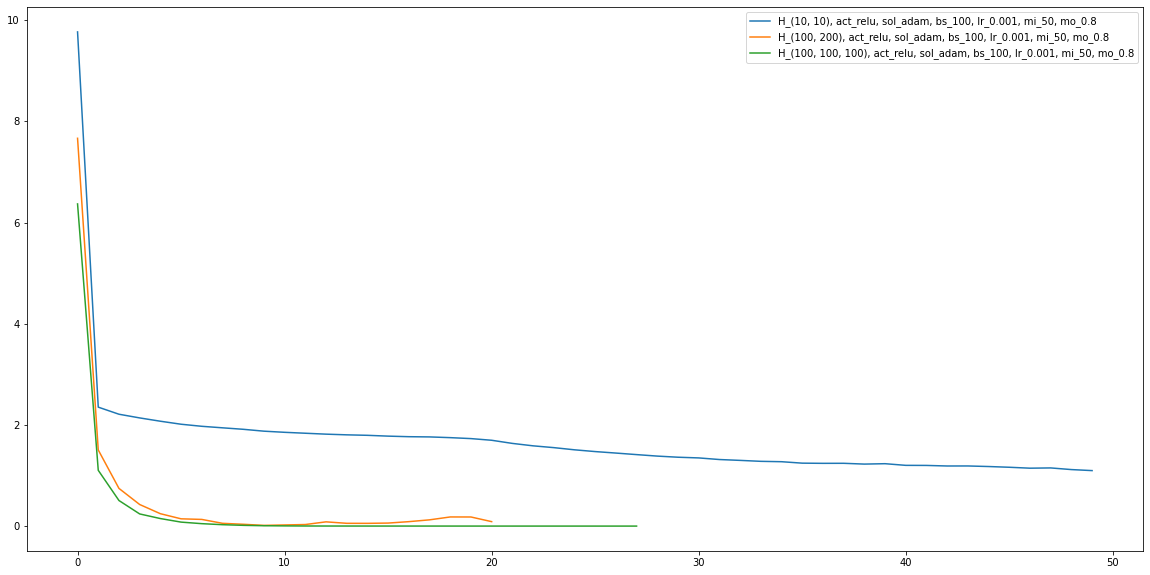

In [22]:
plt.figure(figsize=(20, 10))
for conf in alltest: 
    plt.plot(alltest[conf], label=conf)
plt.legend()